In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import spacy
from sklearn.feature_extraction.text import CountVectorizer
%autosave 10
from wordcloud import WordCloud

Autosaving every 10 seconds


In [2]:
df=pd.read_csv("/home/a25misra/nyt_headline/combined.csv")
print(df.columns)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head(5)

Index(['Unnamed: 0', 'abstract', 'pub_date', 'type_of_material', 'word_count',
       'print_page', 'headline', 'section_name', 'subsection_name'],
      dtype='object')


,abstract,pub_date,type_of_material,word_count,print_page,headline,section_name,subsection_name
0,"New York, New Jersey, Pennsylvania, Delaware, ...",2020-05-03T13:10:38+0000,News,1773,8.0,Seven States to Coordinate on Amassing Medical...,New York,NaN
1,"On our daily walks together, my young daughter...",2020-05-01T19:30:09+0000,Op-Ed,1481,10.0,The Courage to Be Alone,Opinion,Sunday Review
2,The small-scale events could create a road map...,2020-05-01T05:00:06+0000,News,1279,8.0,Tennis Coming Back Slowly With Exhibition Matches,Sports,Tennis
3,"By ordering in, a political reporter continues...",2020-05-01T18:24:58+0000,News,1175,3.0,The Best Part of the Campaign Trail (the Food!...,Food,NaN
4,You or your loved one is another year older no...,2020-05-02T16:00:07+0000,News,1331,7.0,"Go Ahead, Blow Out the Candles on Zoom",Smarter Living,NaN


In [3]:
df.isna().sum()

abstract             227
pub_date               0
type_of_material     227
word_count             0
print_page          2468
headline               0
section_name           0
subsection_name     3874
dtype: int64

In [4]:
nlp=spacy.load("en_core_web_sm")
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [5]:
print(df.headline.tolist())

['Seven States to Coordinate on Amassing Medical Equipment to Fight Coronavirus', 'The Courage to Be Alone', 'Tennis Coming Back Slowly With Exhibition Matches', 'The Best Part of the Campaign Trail (the Food!) Comes Home', 'Go Ahead, Blow Out the Candles on Zoom', 'In Philanthropy, Race Is Still a Factor in Who Gets What, Study Shows', 'Introducing Rhubarb Bars, Lemon Bars’ Pinker Cousins', 'Kim Jong-un Is Back. What Happens When He’s Really Gone?', 'Pride at the Plate for a Little League All-Star', 'Labs Across U.S. Join Federal Initiative to Study Coronavirus Genome', 'The Business of Burps: Scientists Smell Profit in Cow Emissions', 'How ‘All Day and a Night’ Dazzles With a Street Scene', '‘All Day and a Night’ | Anatomy of a Scene', 'A Matter of Taste', 'Can Street Artists Survive a City in Lockdown?', 'Quotation of the Day: Risky New Phase Brings Discord and Unease', 'Doctor Who Promoted Malarial Drug Draws Scrutiny of Federal Prosectors', 'A Shortage of Steak? Yes, and Ranchers 

In [6]:
doc=nlp.pipe(df.headline.tolist())
for token in doc:
    print(token.text)

Seven States to Coordinate on Amassing Medical Equipment to Fight Coronavirus
The Courage to Be Alone
Tennis Coming Back Slowly With Exhibition Matches
The Best Part of the Campaign Trail (the Food!) Comes Home
Go Ahead, Blow Out the Candles on Zoom
In Philanthropy, Race Is Still a Factor in Who Gets What, Study Shows
Introducing Rhubarb Bars, Lemon Bars’ Pinker Cousins
Kim Jong-un Is Back. What Happens When He’s Really Gone?
Pride at the Plate for a Little League All-Star
Labs Across U.S. Join Federal Initiative to Study Coronavirus Genome
The Business of Burps: Scientists Smell Profit in Cow Emissions
How ‘All Day and a Night’ Dazzles With a Street Scene
‘All Day and a Night’ | Anatomy of a Scene
A Matter of Taste
Can Street Artists Survive a City in Lockdown?
Quotation of the Day: Risky New Phase Brings Discord and Unease
Doctor Who Promoted Malarial Drug Draws Scrutiny of Federal Prosectors
A Shortage of Steak? Yes, and Ranchers Knew It Was Coming
A Pandemic Isn’t a Reason to Aboli

In [7]:
token_list=[]


for headline in df.headline:
    head=nlp(headline.lower())
    for token in head:
        if(token.is_stop ==False and token.is_punct == False):
            token_list.append(token.lemma_)
    
print(token_list)
'''
print("hello1")
for headline in doc:
    print("p1")
    for head in headline:
        token_list.append(head.lemma)
        print("hello")
        print(token_list)   
'''

['seven', 'state', 'coordinate', 'amass', 'medical', 'equipment', 'fight', 'coronavirus', 'courage', 'tennis', 'come', 'slowly', 'exhibition', 'match', 'good', 'campaign', 'trail', 'food', 'come', 'home', 'ahead', 'blow', 'candle', 'zoom', 'philanthropy', 'race', 'factor', 'get', 'study', 'show', 'introduce', 'rhubarb', 'bar', 'lemon', 'bar', 'pinker', 'cousin', 'kim', 'jong', 'un', 'happen', 'go', 'pride', 'plate', 'little', 'league', 'star', 'lab', 'u.s', 'join', 'federal', 'initiative', 'study', 'coronavirus', 'genome', 'business', 'burps', 'scientist', 'smell', 'profit', 'cow', 'emission', 'day', 'night', 'dazzle', 'street', 'scene', 'day', 'night', '|', 'anatomy', 'scene', 'matter', 'taste', 'street', 'artist', 'survive', 'city', 'lockdown', 'quotation', 'day', 'risky', 'new', 'phase', 'bring', 'discord', 'unease', 'doctor', 'promote', 'malarial', 'drug', 'draw', 'scrutiny', 'federal', 'prosector', 'shortage', 'steak', 'yes', 'rancher', 'know', 'come', 'pandemic', 'reason', 'aboli

'\nprint("hello1")\nfor headline in doc:\n    print("p1")\n    for head in headline:\n        token_list.append(head.lemma)\n        print("hello")\n        print(token_list)   \n'

In [8]:
vocab=list(set(token_list))

In [9]:
len(vocab)

7687

In [10]:
bow=pd.DataFrame(0.0, index=np.arange(len(df)),columns=vocab)

In [11]:
idx=0
for headline in df.headline:
    head=nlp(headline.lower())
    for token in head:
        if(token.is_stop ==False and token.is_punct == False):
            bow.loc[idx,token.lemma_]+=1
    idx+=1      

In [12]:
bow.head(5)

,enter,booker,singe,u.s.t.a,fixer,clementine,surrenders,kevin,bootstrap,olympic,...,assist,underdog,probably,refusal,freeway,workplace,tuesday,haddad,app,sitter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.pub_date=pd.to_datetime(df.pub_date)
bow["date_data"]=df.pub_date.dt.date
target=[0 if x<pd.to_datetime("2020-05-25") else 1 for x in bow.date_data]

In [14]:
"date_data" in bow.columns.tolist()

True

In [15]:
len(bow)

6363

In [16]:
bow_sum=bow.groupby(['date_data']).sum()
bow_sum.reset_index(inplace=True)
len(bow_sum)

52

In [17]:
%autosave 10

Autosaving every 10 seconds


In [18]:
bow_sum['target_data']=[0 if x<pd.to_datetime("2020-05-25") else 1 for x in bow_sum.date_data]

In [19]:
bow_before=bow_sum[bow_sum.date_data< pd.to_datetime("2020-05-25")]
bow_before.drop(['target_data','date_data'],axis=1,inplace=True)
before=bow_before.sum(axis=0)
print(before)
dict_freq={}
for a in before.index:
    dict_freq[a]=before.loc[a]
print(dict_freq)


enter         3.0
booker        1.0
singe         1.0
u.s.t.a       0.0
fixer         0.0
             ... 
workplace     1.0
tuesday      13.0
haddad        1.0
app           3.0
sitter        0.0
Length: 7687, dtype: float64


/home/a25misra/nlp_proc/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


{'enter': 3.0, 'booker': 1.0, 'singe': 1.0, 'u.s.t.a': 0.0, 'fixer': 0.0, 'clementine': 1.0, 'surrenders': 0.0, 'kevin': 0.0, 'bootstrap': 1.0, 'olympic': 2.0, 'calendar': 1.0, 'wilson': 1.0, 'springsteen': 1.0, 'wheat': 1.0, 'historical': 0.0, 'espn': 1.0, 'pamela': 1.0, 'mangaza': 0.0, 'hoop': 1.0, 'devise': 0.0, 'genetic': 0.0, 'inspector': 5.0, 'george': 5.0, 'halt': 4.0, 'overwhelm': 0.0, 'benefit': 6.0, 'binge': 2.0, 'launch': 1.0, 'eerily': 1.0, 'law': 10.0, 'slip': 0.0, 'microrobotic': 1.0, 'shimmer': 1.0, 'comprehend': 1.0, '11th': 0.0, 'haviv': 0.0, 'beethoven': 2.0, 'half': 6.0, 'musical': 6.0, 'cliff': 0.0, 'adventure': 0.0, 'diabetes': 0.0, 'cop': 1.0, 'bridge': 5.0, 'a.p': 1.0, 'lucky': 2.0, 'humbert': 1.0, 'derby': 1.0, 'biohazard': 0.0, 'sweet': 2.0, 'exercise': 1.0, 'rare': 3.0, 'levitt': 1.0, 'punish': 0.0, 'sky': 3.0, 'influence': 2.0, 'rattle': 3.0, 'quicker': 1.0, 'answer': 3.0, 'maria': 0.0, 'fable': 1.0, 'paris': 2.0, 'profit': 2.0, 'september': 0.0, 'festivus': 

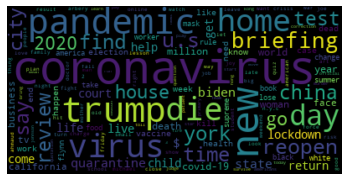

In [20]:
wordcloud=WordCloud()
wordcloud.generate_from_frequencies(frequencies=dict_freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
bow_after=bow_sum[bow_sum.date_data> pd.to_datetime("2020-05-25")].copy()
bow_after.drop(['target_data','date_data'],axis=1,inplace=True)
after=bow_after.sum(axis=0)
print(after)
dict_after={}
for a in after.index:
    dict_after[a]=after.loc[a]
print(dict_after)

enter         4.0
booker        0.0
singe         0.0
u.s.t.a       1.0
fixer         1.0
             ... 
workplace     1.0
tuesday      14.0
haddad        0.0
app           8.0
sitter        1.0
Length: 7687, dtype: float64
{'enter': 4.0, 'booker': 0.0, 'singe': 0.0, 'u.s.t.a': 1.0, 'fixer': 1.0, 'clementine': 0.0, 'surrenders': 1.0, 'kevin': 2.0, 'bootstrap': 0.0, 'olympic': 3.0, 'calendar': 0.0, 'wilson': 1.0, 'springsteen': 0.0, 'wheat': 2.0, 'historical': 1.0, 'espn': 0.0, 'pamela': 2.0, 'mangaza': 1.0, 'hoop': 0.0, 'devise': 1.0, 'genetic': 1.0, 'inspector': 2.0, 'george': 63.0, 'halt': 4.0, 'overwhelm': 1.0, 'benefit': 5.0, 'binge': 2.0, 'launch': 10.0, 'eerily': 0.0, 'law': 17.0, 'slip': 1.0, 'microrobotic': 0.0, 'shimmer': 0.0, 'comprehend': 0.0, '11th': 6.0, 'haviv': 1.0, 'beethoven': 2.0, 'half': 1.0, 'musical': 1.0, 'cliff': 1.0, 'adventure': 1.0, 'diabetes': 1.0, 'cop': 6.0, 'bridge': 1.0, 'a.p': 1.0, 'lucky': 0.0, 'humbert': 0.0, 'derby': 0.0, 'biohazard': 1.0, 'sweet':

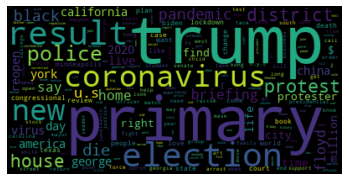

In [22]:
wordcloud=WordCloud()
wordcloud.generate_from_frequencies(frequencies=dict_after)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
bow.drop(["date_data"],axis=1, inplace=True)
idf={}
for a in bow.columns:
    idf[a]=np.log(len(bow)/(len(bow[bow[a]!=0])+1))
print(idf)

{'enter': 6.678813701552956, 'booker': 8.065108062672847, 'singe': 8.065108062672847, 'u.s.t.a': 8.065108062672847, 'fixer': 8.065108062672847, 'clementine': 8.065108062672847, 'surrenders': 8.065108062672847, 'kevin': 7.659642954564682, 'bootstrap': 8.065108062672847, 'olympic': 6.966495774004737, 'calendar': 8.065108062672847, 'wilson': 7.659642954564682, 'springsteen': 8.065108062672847, 'wheat': 7.3719608821129015, 'historical': 8.065108062672847, 'espn': 8.065108062672847, 'pamela': 7.3719608821129015, 'mangaza': 8.065108062672847, 'hoop': 8.065108062672847, 'devise': 8.065108062672847, 'genetic': 8.065108062672847, 'inspector': 6.678813701552956, 'george': 4.524148738635533, 'halt': 6.561030665896573, 'overwhelm': 8.065108062672847, 'benefit': 6.2733485934447915, 'binge': 7.148817330798692, 'launch': 6.193305885771255, 'eerily': 8.065108062672847, 'law': 5.426050733057588, 'slip': 8.065108062672847, 'microrobotic': 8.065108062672847, 'shimmer': 8.065108062672847, 'comprehend': 8.

In [24]:
tfidf=bow.copy()
tfidf["containing_term"]=tfidf.gt(0).sum(axis=1)
print(len(tfidf[tfidf["containing_term"]==0]))
print(tfidf[tfidf["containing_term"]==0].index)
for i in tfidf[tfidf["containing_term"]==0].index.to_list():
    del target[i]
tfidf=tfidf.iloc[:,:].div(tfidf.containing_term,axis=0)
for key in idf.keys():
    tfidf.loc[:,key]=tfidf.loc[:,key]*idf[key]
tfidf.drop(["containing_term"],axis=1, inplace=True)
tfidf.dropna(how='any',axis=0,inplace=True)

6
Int64Index([645, 1380, 2709, 3876, 4291, 5430], dtype='int64')


In [25]:
print(tfidf.isna().sum())

enter        0
booker       0
singe        0
u.s.t.a      0
fixer        0
            ..
workplace    0
tuesday      0
haddad       0
app          0
sitter       0
Length: 7687, dtype: int64


In [26]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(tfidf)
print(svd.singular_values_)

[15.32425547 14.79205109 14.29647649 13.66530121 13.0349164 ]


In [27]:
terms = tfidf.columns

for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
result
 
election
 
primary
 
district
 
house
 
2020
 
california
 
Topic 1: 
briefing
 
coronavirus
 
happen
 
today
 
friday
 
tuesday
 
monday
 
Topic 2: 
heck
 
police
 
potato
 
reopen
 
change
 
juneteenth
 
work
 
Topic 3: 
2020
 
correction
 
june
 
class
 
live
 
14
 
19
 
Topic 4: 
new
 
pandemic
 
york
 
home
 
trump
 
protest
 
parent
 


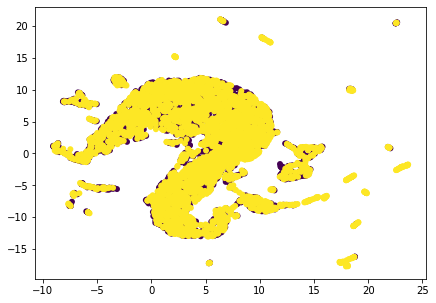

In [30]:
import umap.umap_ as umap

X_topics = svd.fit_transform(tfidf)
embedding = umap.UMAP(n_neighbors=15, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = target,
edgecolor='none'
)
plt.show()

transformed (6357, 2)


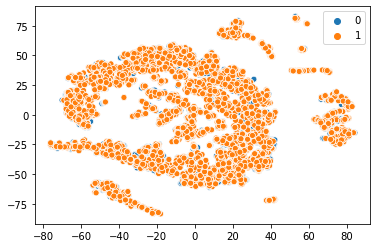

In [29]:
from sklearn.manifold import TSNE
X_transformed = TSNE(n_components=2).fit_transform(X_topics)
print("transformed",X_transformed.shape)
ax=sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,1],hue=target,legend="full")
plt.show()

# Classification won't need separate vocabulary || Sentiment analysis